In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

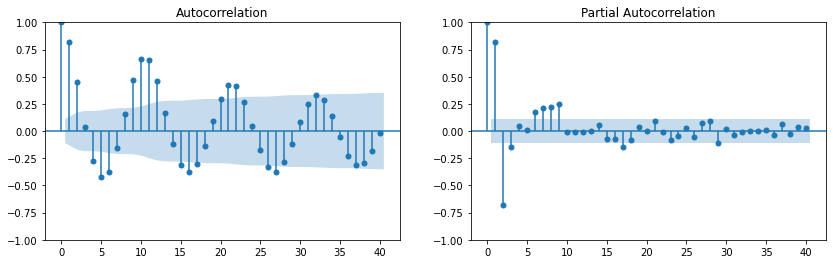

In [40]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
fig, ax = plt.subplots(1,2, figsize=(14,4))
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax= ax[0])
sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, method='ywm', ax=ax[1])
plt.show()


Veo que ocurre con la serie diferenciada estacional

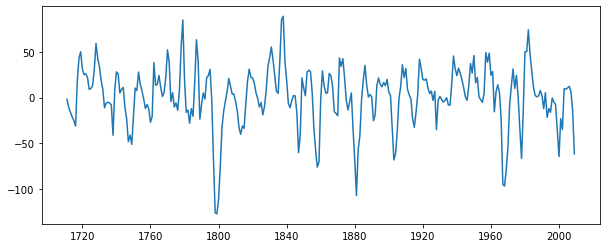

In [3]:
dta_10diff = dta.diff(10).iloc[10:]
fig, ax  = plt.subplots(1,1, figsize=(10,4))
plt.plot(dta_10diff)


In [4]:
from statsmodels.tsa.stattools import adfuller, kpss
print('ADFULLER', adfuller(dta_10diff), '\n')
print('KPSS',kpss(dta_10diff))

ADFULLER (-4.446164695331475, 0.0002457042302737755, 16, 282, {'1%': -3.4537536300652, '5%': -2.8718443180148836, '10%': -2.572260641818822}, 2468.208378091972) 

KPSS (0.04713953018854742, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


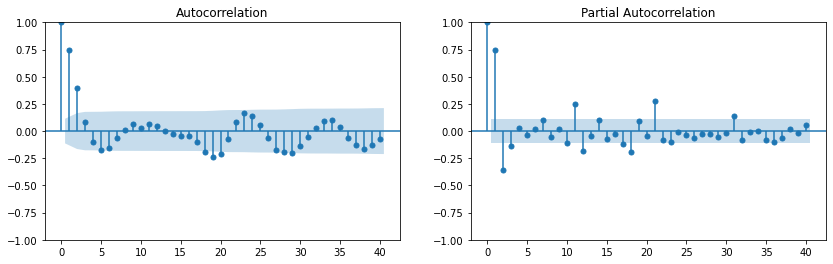

In [6]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sm.graphics.tsa.plot_acf(dta_10diff.values.squeeze(), lags=40, ax= ax[0])
sm.graphics.tsa.plot_pacf(dta_10diff.values.squeeze(), lags=40, method='ywm', ax=ax[1])
plt.show()

In [36]:
arima = ARIMA(dta.values, order=(2,0,3), seasonal_order=(1,1,1,11))
arima_fit = arima.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  309
Model:             ARIMA(2, 0, 3)x(1, 1, [1], 11)   Log Likelihood               -1257.865
Date:                            Fri, 16 Sep 2022   AIC                           2531.730
Time:                                    21:16:29   BIC                           2561.307
Sample:                                         0   HQIC                          2543.569
                                            - 309                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2853      0.183      7.037      0.000       0.927       1.643
ar.L2         -0.6071      0.108     -5.632      0.000      -0.818      -0.396
ma.L1         -0.0998      0.187     -0.533      0.594      -0.467       0.267
ma.L2          0.0945      0.138      0.685      0.493      -0.176       0.365
ma.L3          0.0224      0.122      0.184      0.854      -0.217       0.261
ar.S.L11       0.2089      0.074      2.826      0.005       0.064       0.354
ma.S.L11      -0.9780      0.144     -6.787      0.000      -1.260      -0.696
sigma2       247.3620     30.231      8.182      0.000     188.110     306.614
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               155.97
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             1.12
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

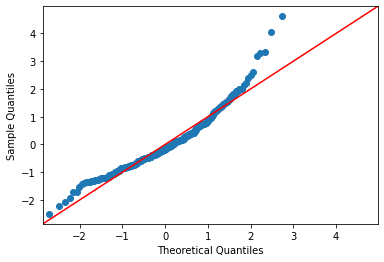

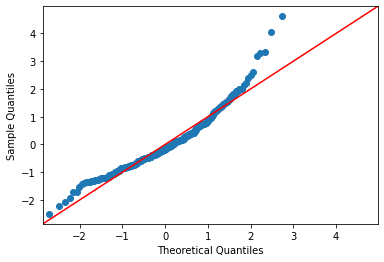

In [37]:
resid = arima_fit.resid
sm.qqplot((resid-resid.mean())/resid.std(), line="45")


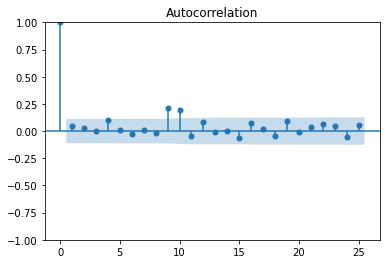

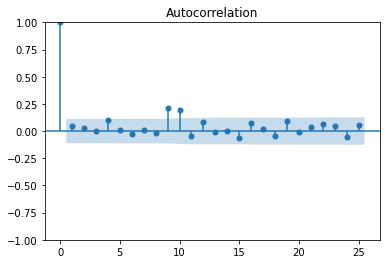

In [38]:
sm.graphics.tsa.plot_acf(resid)

In [33]:
arima = ARIMA(dta.values, order=(2,1,3), seasonal_order=(0,1,1,12))
arima_fit = arima.fit()
arima_fit.summary()

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  309
Model:             ARIMA(2, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -1251.934
Date:                            Fri, 16 Sep 2022   AIC                           2517.868
Time:                                    20:54:42   BIC                           2543.701
Sample:                                         0   HQIC                          2528.211
                                            - 309                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6084      0.029     55.070      0.000       1.551       1.666
ar.L2         -0.9328      0.024    -38.205      0.000      -0.981      -0.885
ma.L1         -1.4432      0.061    -23.733      0.000      -1.562      -1.324
ma.L2          0.4691      0.101      4.651      0.000       0.271       0.667
ma.L3          0.1220      0.064      1.902      0.057      -0.004       0.248
ma.S.L12      -0.9987      2.759     -0.362      0.717      -6.406       4.409
sigma2       241.3748    662.225      0.364      0.715   -1056.563    1539.313
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.42
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

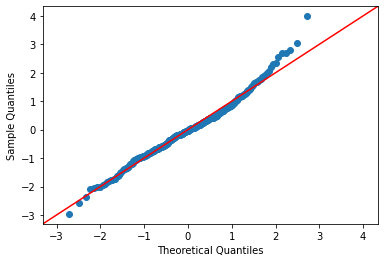

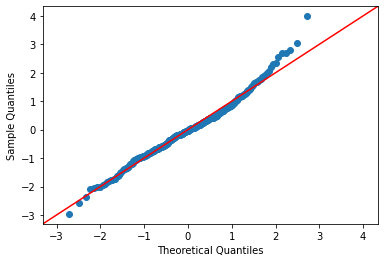

In [34]:
resid = arima_fit.resid
sm.qqplot((resid-resid.mean())/resid.std(), line="45")

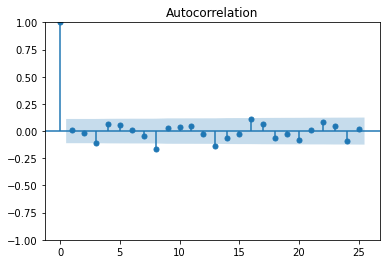

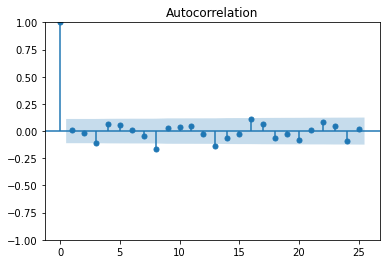

In [35]:
sm.graphics.tsa.plot_acf(resid)